In [ ]:
# # Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing Dataset from Local drive
from google.colab import files
Uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
# Importing the dataset from Google Drive
dataset = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(400, 5)


In [ ]:
#Print Imformation about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, 2:4].values
# Extracting dependent variable:
y = dataset.iloc[:, 4].values


In [ ]:
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [ ]:
print(X_train)

[[    45  79000]
 [    45  22000]
 [    59  76000]
 [    30  62000]
 [    35  61000]
 [    27  57000]
 [    29  61000]
 [    42  65000]
 [    28 123000]
 [    40  75000]
 [    49  28000]
 [    24  58000]
 [    21  16000]
 [    35  77000]
 [    27  17000]
 [    35  59000]
 [    32 117000]
 [    35  60000]
 [    27  54000]
 [    28  79000]
 [    57  74000]
 [    55  39000]
 [    36  50000]
 [    28  32000]
 [    26  86000]
 [    41  51000]
 [    37  70000]
 [    22  81000]
 [    27  58000]
 [    49  65000]
 [    40  61000]
 [    23  63000]
 [    47  23000]
 [    54 104000]
 [    27  96000]
 [    39 134000]
 [    60  46000]
 [    59  29000]
 [    20  36000]
 [    37  72000]
 [    36 144000]
 [    32  18000]
 [    30  80000]
 [    35  39000]
 [    19  25000]
 [    60 108000]
 [    26  30000]
 [    41  72000]
 [    59 130000]
 [    36  99000]
 [    48 119000]
 [    40  71000]
 [    30  79000]
 [    31  74000]
 [    59  88000]
 [    44 139000]
 [    54 108000]
 [    26 118000]
 [    47  3400

In [ ]:
print(X_test)

[[    40  57000]
 [    20  82000]
 [    58  47000]
 [    39  42000]
 [    39  79000]
 [    41  72000]
 [    18  52000]
 [    31  34000]
 [    36 118000]
 [    30 135000]
 [    55 130000]
 [    37  33000]
 [    20  82000]
 [    27 137000]
 [    48  41000]
 [    27  84000]
 [    42  54000]
 [    35  57000]
 [    35  72000]
 [    39  61000]
 [    27  88000]
 [    25  87000]
 [    30  49000]
 [    53 143000]
 [    48  29000]
 [    28  84000]
 [    26  81000]
 [    42  53000]
 [    59 143000]
 [    31  18000]
 [    26  15000]
 [    47  20000]
 [    19  19000]
 [    47  47000]
 [    33  60000]
 [    36  63000]
 [    45  32000]
 [    18  86000]
 [    53 104000]
 [    43 129000]
 [    31  15000]
 [    42  54000]
 [    33  41000]
 [    52 138000]
 [    46  79000]
 [    39 122000]
 [    40  60000]
 [    51  23000]
 [    48 134000]
 [    57  60000]
 [    48 131000]
 [    38 113000]
 [    57 122000]
 [    25  22000]
 [    41  80000]
 [    49 141000]
 [    42  73000]
 [    31  66000]
 [    42  8000

In [ ]:
print(y_test)

[0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]


In [ ]:
print(y_train)

[0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0]


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.66804706  0.27675082]
 [ 0.66804706 -1.42007209]
 [ 2.00989195  0.18744436]
 [-0.76964389 -0.22931917]
 [-0.29041357 -0.25908799]
 [-1.05718208 -0.37816328]
 [-0.86548995 -0.25908799]
 [ 0.38050887 -0.1400127 ]
 [-0.96133601  1.58657904]
 [ 0.18881674  0.15767553]
 [ 1.05143131 -1.24145915]
 [-1.34472027 -0.34839446]
 [-1.63225846 -1.59868503]
 [-0.29041357  0.21721318]
 [-1.05718208 -1.5689162 ]
 [-0.29041357 -0.31862564]
 [-0.57795176  1.4079661 ]
 [-0.29041357 -0.28885681]
 [-1.05718208 -0.46746975]
 [-0.96133601  0.27675082]
 [ 1.81819982  0.12790671]
 [ 1.62650769 -0.9140021 ]
 [-0.19456751 -0.58654504]
 [-0.96133601 -1.12238386]
 [-1.15302814  0.48513259]
 [ 0.28466281 -0.55677622]
 [-0.09872145  0.00883142]
 [-1.53641239  0.33628847]
 [-1.05718208 -0.34839446]
 [ 1.05143131 -0.1400127 ]
 [ 0.18881674 -0.25908799]
 [-1.44056633 -0.19955034]
 [ 0.85973919 -1.39030326]
 [ 1.53066163  1.0209714 ]
 [-1.05718208  0.78282082]
 [ 0.09297068  1.91403609]
 [ 2.10573801 -0.70562033]
 

In [ ]:
print(X_test)

[[ 0.18881674 -0.37816328]
 [-1.72810452  0.36605729]
 [ 1.91404588 -0.67585151]
 [ 0.09297068 -0.82469563]
 [ 0.09297068  0.27675082]
 [ 0.28466281  0.06836906]
 [-1.91979665 -0.5270074 ]
 [-0.67379782 -1.06284621]
 [-0.19456751  1.43773492]
 [-0.76964389  1.94380491]
 [ 1.62650769  1.7949608 ]
 [-0.09872145 -1.09261503]
 [-1.72810452  0.36605729]
 [-1.05718208  2.00334256]
 [ 0.95558525 -0.85446445]
 [-1.05718208  0.42559494]
 [ 0.38050887 -0.46746975]
 [-0.29041357 -0.37816328]
 [-0.29041357  0.06836906]
 [ 0.09297068 -0.25908799]
 [-1.05718208  0.54467023]
 [-1.2488742   0.51490141]
 [-0.76964389 -0.61631387]
 [ 1.43481557  2.1819555 ]
 [ 0.95558525 -1.21169033]
 [-0.96133601  0.42559494]
 [-1.15302814  0.33628847]
 [ 0.38050887 -0.49723857]
 [ 2.00989195  2.1819555 ]
 [-0.67379782 -1.53914738]
 [-1.15302814 -1.62845385]
 [ 0.85973919 -1.47960973]
 [-1.82395058 -1.50937856]
 [ 0.85973919 -0.67585151]
 [-0.4821057  -0.28885681]
 [-0.19456751 -0.19955034]
 [ 0.66804706 -1.12238386]
 

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

[0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[64  5]
 [ 8 23]]


In [ ]:
# calculate Accuracy
# calculate Accuracy
#   0   1
# 0[66  2(FP type 1)]
#1 [8(FN Type 24) 23]
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 87.00


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives) 
# calculate Accuracy
#   0   1
# 0[59  7(FP type 1)]
#1 [ 11(FN Type 2) 23]= 23/30
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.2f' % (precision))

Precision: 0.82


In [ ]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
# calculate Accuracy
#   0   1
# 0[59  7(FP type 1)]
#1 [ 11(FN Type 2) 23]= 23/23+11
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall))

Recall: 0.742


In [ ]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# (2*0.829*0.906)/0.829+0.906
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 77.966


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


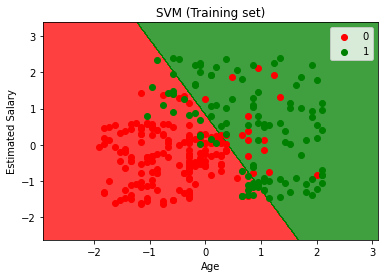

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 96.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


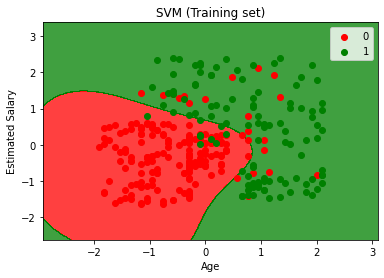

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0,probability=True)
classifier.fit(X_train, y_train)

NameError: ignored

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 74.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


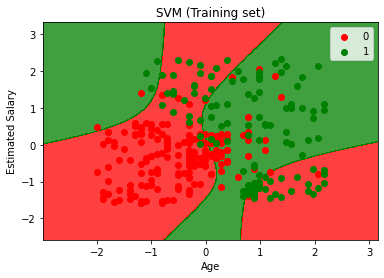

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[54 14]
 [12 20]]


In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 74.00


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 58.824


In [ ]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 62.500


In [ ]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 60.606


In [ ]:

age = 41 #@param {type:"number"}
estimated_Salary = 15000 #@param {type:"number"}
variable_name = "12" #@param {type:"string"}
output=classifier.predict(sc.transform([[ age ,estimated_Salary ]]))
print("Purchased =", output)
if output==[1]:
  print( 'Custome will purchase Product')
else:
  print('Customer will not purchase computer')


Purchased = [1]
Custome will purchase Product


In [ ]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier) 
  
# Load the pickled model 
model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
model.predict(X_test) 

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# save the model to disk
import joblib
filename = '/content/drive/My Drive/FDP/svm_model.sav'
joblib.dump(classifier, filename)
 
# some time later...
 
# load the model from disk
randomforest_model = joblib.load(filename)
result = randomforest_model.score(X_test, y_test)
print("Result is " , result)

Result is  0.96


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/svmmodel.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/svmmodel.pkl', 'rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 91.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


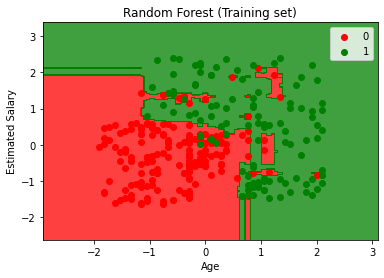

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[66  3]
 [ 6 25]]


In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 91.00


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 89.286


In [ ]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 80.645


In [ ]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 84.746


In [ ]:

age = 41 #@param {type:"number"}
estimated_Salary = 150000 #@param {type:"number"}
output=classifier.predict(sc.transform([[ age ,estimated_Salary ]]))
print("Perchased =", output)
if output==[1]:
  print( 'Custome will purchase Product')
else:
  print('Customer will not purchase computer')


Perchased = [1]
Custome will purchase Product


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/randomforest.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/randomforest.pkl', 'rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
!pip install streamlit

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyngrok

     |████████████████████████████████| 747kB 8.6MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=5cf89b27755d435f2c4be2c01724706d95db592683becb3f0a9d99d71a2d6cb2
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/svmmodel.pkl', 'rb')) 
model_randomforest = pickle.load(open('/content/drive/My Drive/randomforest.pkl', 'rb')) 
dataset= pd.read_csv('/content/drive/My Drive/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
def predict_note_authentication(UserID, Gender,Age,EstimatedSalary):
  output= model.predict(sc.transform([[Age,EstimatedSalary]]))
  print("Purchased", output)
  if output==[1]:
    prediction="Item will be purchased"
  else:
    prediction="Item will not be purchased"
  print(prediction)
  return prediction
def predict_random(UserID, Gender,Age,EstimatedSalary):
  output= model_randomforest.predict(sc.transform([[Age,EstimatedSalary]]))
  print("Purchased", output)
  if output==[1]:
    prediction="Item will be purchased"
  else:
    prediction="Item will not be purchased"
  print(prediction)
  return prediction
def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;"Machine Learning Lab Experiment</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Item Purchase Prediction using SVM Algorithm")
    UserID = st.text_input("UserID","")
    Gender = st.selectbox(
    "Gender",
    ("Male", "Female", "Others")
    )
    
    Age = st.number_input('Insert a Age',18,60)
    #Age = st.text_input("Age","Type Here")
    EstimatedSalary = st.number_input("Insert EstimatedSalary",15000,150000)
    resul=""
    if st.button("SVM Prediction"):
      result=predict_note_authentication(UserID, Gender,Age,EstimatedSalary)
      st.success('SVM Model has predicted {}'.format(result))
    if st.button("Random Forest Prediction"):
      result=predict_random(UserID, Gender,Age,EstimatedSalary)
      st.success('Random forest Model  has predicted {}'.format(result))  
    if st.button("About"):
      st.header("Developed by Deepak Moud")
      st.subheader("Head , Department of Computer Engineering")
    html_temp = """
    <div class="" style="background-color:orange;" >
    <div class="clearfix">           
    <div class="col-md-12">
    <center><p style="font-size:20px;color:white;margin-top:10px;">Machine Learning Experiment 5: Support Vector Machine and Random Forest</p></center> 
    </div>
    </div>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
if __name__=='__main__':
  main()

Writing app.py


In [ ]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://1973caa3631c.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2021-04-22 09:35:00.805 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.125.137.201:80

Purchased [0]
Item will not be purchased
Purchased [0]
Item will not be purchased
  Stopping...


In [ ]:
ngrok.kill()